<a href="https://colab.research.google.com/github/hatahet91/projects/blob/master/FinTechCase_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

#import io to upload to colab

import io

In [10]:
#import the dataset

from google.colab import files
uploaded = files.upload()

Saving new_appdata10.csv to new_appdata10 (1).csv


In [0]:

dataset = pd.read_csv(io.BytesIO(uploaded['new_appdata10.csv']))


In [0]:
#EDA

In [18]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [19]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [0]:
#plotting
#create a copy of the df and drop columns we don't need ie user, screen list, enrolled date
#also drop the label
dataset2 =  dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                          'first_open', 'enrolled'])

In [46]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


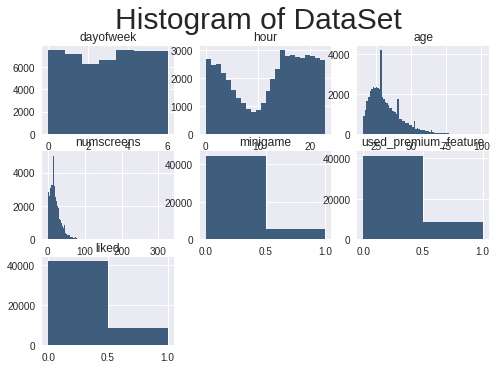

In [54]:

#Histogram

plt.suptitle('Histogram of DataSet', fontsize = 30)
for i in range(1, dataset2.shape[1]+ 1):
  plt.subplot(3, 3, i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i - 1])
  vals = np.size(dataset2.iloc[:, i - 1].unique())
  plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D')
  
  
  #create a figure
fig = plt.figure(figsize = (15, 12))
#give the figure a supertitle
plt.suptitle('Histogram of Numerical Features', fontsize = 20)

#loop through each feature from 1 to the last column + 1

for i in range(1, dataset2.shape[1] + 1):
  #create subplot of 6 rows and 5 columns (6x5 = 30 features)
  plt.subplot(6,5,i)
  f = plt.gca()
  #get rid of the y labels so we don't make the plot too busy
  f.axes.get_yaxis().set_visible(False)
  #give each feature histogram its own title
  f.set_title(dataset2.columns.values[i - 1])
  
  
  
  
  #set the number of bins based on the unique values in the features
  vals = np.size(dataset2.iloc[:, i -1 ].unique())
  #plot
  
  
  
  plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')

plt.tight_layout(rect=[0,0.03,1,0.95])

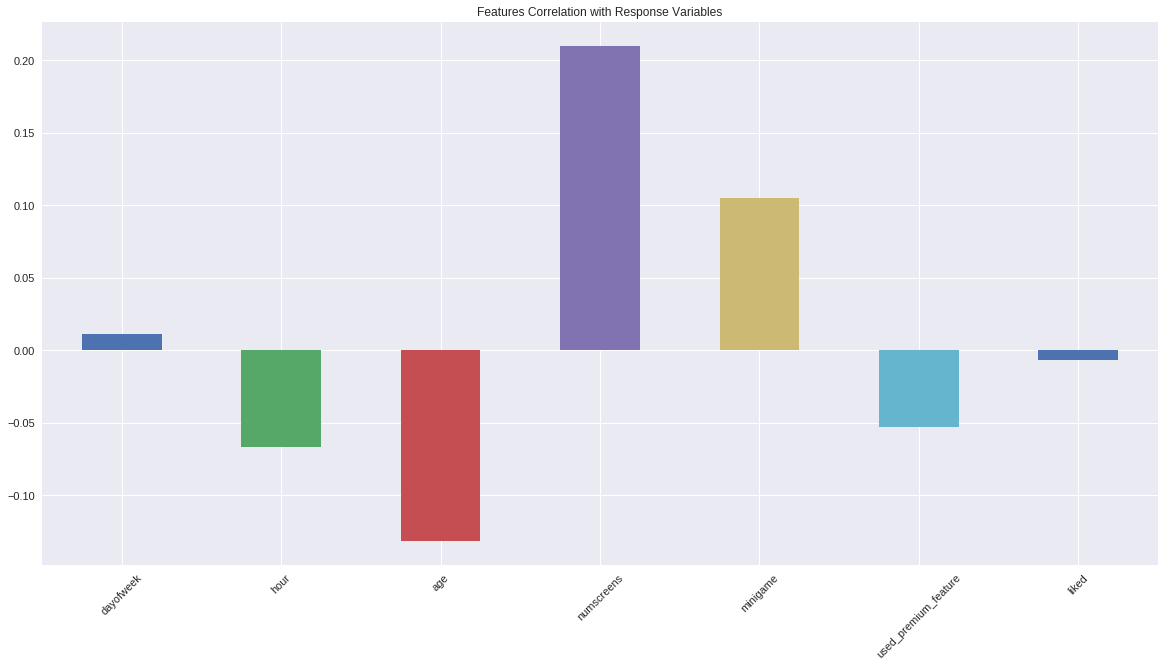

In [57]:
#let's see if there's any correlation between the features

dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                                             title = "Features Correlation with Response Variables",
                                             fontsize = 11, rot =45,
                                             grid = True)

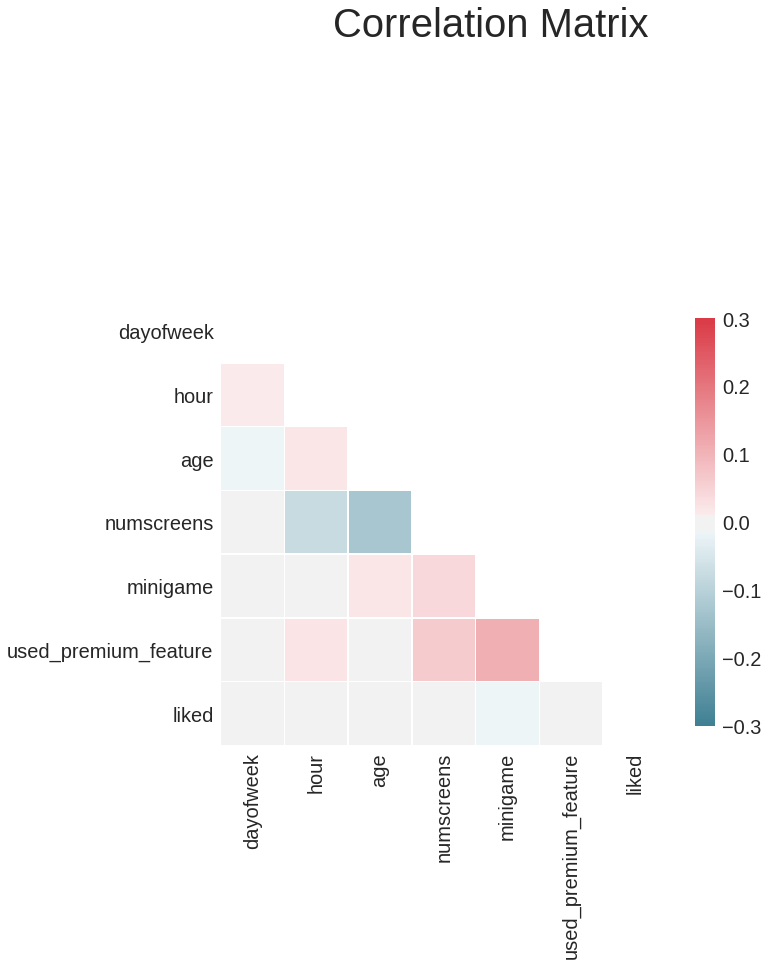

In [64]:
#let's compere the correlation between each feature using a correlation matrix. Rememebr, the more indepedent the relation between the features, the better the features.


#build the cm background
sn.set(style = 'white', font_scale = 2)

#compute the correlation matrix
cm = dataset2.corr()
       
#generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True


#set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

#Generate a colormap
cmap = sn.diverging_palette(220,10, as_cmap = True)

#create the heatmap for the cm
sn.heatmap(cm, mask=mask, cmap=cmap, vmax= .3, center = 0, square = True, linewidths = 0.5, cbar_kws={"shrink": 0.5})

In [0]:
#FEATURE ENGINEERING

In [65]:
#feature engineering is to fine-tune our features in regards to our target variables
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [72]:
#convert the time data types so we can do calculations on them
 
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]
dataset.dtypes

AttributeError: ignored

In [76]:
dataset.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
difference                     float64
dtype: object

In [0]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

<function matplotlib.pyplot.show>

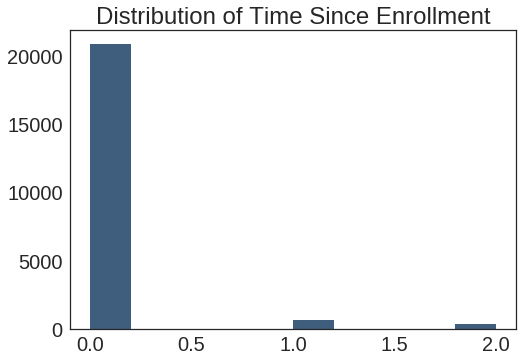

In [83]:
#this plot shows when users enroll into the program from the time they install it.
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0, 2])
plt.title("Distribution of Time Since Enrollment")
plt.show

In [0]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [0]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [87]:
#feature engineer the screen_list

from google.colab import files
uploaded = files.upload()

Saving top_screens.csv to top_screens.csv


In [0]:

top_screens = pd.read_csv(io.BytesIO(uploaded['top_screens.csv'])).top_screens.values

In [95]:
top_screens.head()

AttributeError: ignored

In [0]:

dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [0]:
for sc in top_screens:
  dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
  dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")

In [0]:
dataset["Other"] = dataset.screen_list.str.count(",")

In [0]:
dataset = dataset.drop(columns = ["screen_list"])

In [0]:
#funnels
#grouping screens belonging to the same set

savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                   "Saving9",
                  "Saving10"]

In [0]:
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)

In [0]:
dataset = dataset.drop(columns = savings_screens)

In [110]:
cm_screens = ["Credit1",
              "Credit2",
              "Credit3",
              "Credit3Container",
              "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns= cm_screens)

cc_screens = ["CC1",
             "CC1Category",
             "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns = cc_screens)

loan_screens = ["Loan",
              "Loan2",
              "Loan3",
              "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

KeyError: ignored

In [111]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,10,0,2,0
